# Kombinovanje slika

Furijeove transformacije se mogu koristiti i za realizaciju mnogih zanimljivih efekata nad slikama. Sledeći primer ilustruje kreiranje kombinacije slika (engl. image blending). 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from PIL import Image

Prvo ćemo koristeći PIL biblioteku učitati slike `math.jpg` i `fourie.jpg`, prebaciti ih u crno-beli mod, a potom i prikazati njihove sadržaje. 

In [8]:
image_math_original = Image.open('data/math.jpg')

In [9]:
image_math = np.array(image_math_original.convert('L'))

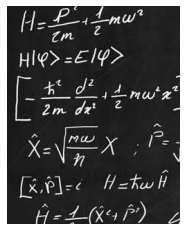

In [10]:
plt.imshow(image_math, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
image_fourier_original = Image.open('data/fourier.jpg')

In [16]:
image_fourier = np.array(image_fourier_original.convert('L'))

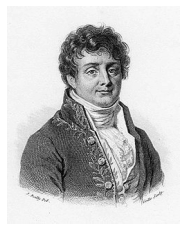

In [20]:
plt.imshow(image_fourier,cmap ="gray")
plt.axis('off')
plt.show()

Možemo se uveriti da su slike istih dimenzija. 

In [21]:
image_math.shape

(316, 250)

In [22]:
image_fourier.shape

(316, 250)

To će dalje garantovati da su i spektri ovih slika istih dimenzija.

Sada ćemo napisati funkciju `blend(image1, image2, alpha)` koja kreira linearnu kombinaciju frekvencijskih spektara slika `image1` i `image2` sa koeficijentima `alpha` i `1-alpha`, a potom inverznom Furijeovom transformacijom generiše rezultujuću sliku. Preciznije, ako je `spectar1` frekvencijski spektar prve slike, a `spectar2` frekvencijski spektar druge slike, funkcija formira `alpha*spectar1+(1-alpha)*spectar2` frekvencijski spektar, a potom inverznom Furijeovom transformacijom generiše rezultujuću sliku.  

In [24]:
def image_blend(image1, image2, alpha):
    spectar1 = np.fft.fft2(image1)
    spectar1_shifted = np.fft.fftshift(spectar1)

    spectar2 = np.fft.fft2(image2)
    spectar2_shifted = np.fft.fftshift(spectar2)

    spectar_blended_shifted = alpha*spectar1_shifted + (1-alpha)*spectar2_shifted    
    #inverzna furijova za kombinaciu slika sa prvo siftovanje
    spectar_blended = np.fft.ifftshift(spectar_blended_shifted)
    spectar_final = np.fft.ifft2(spectar_blended)
    
    return np.abs(spectar_final).astype('int32')

Možemo primeniti funkciju `blend` nad slikama `math.jpg` i `fourie.jpg` sa parametrom `alpha=0.2` i prikazati rezultujuću sliku.

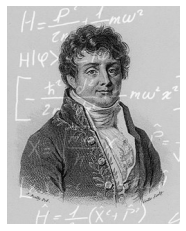

In [26]:
blend = image_blend(image_math, image_fourier, 0.2)
plt.imshow(blend, cmap='gray')
plt.axis('off')
plt.show()

Ukoliko primenimo parametar `alpha=0.7` dobija se nešto malo drugačija slika:

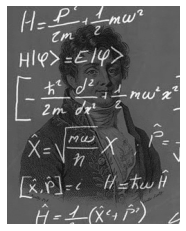

In [27]:
blend = image_blend(image_math, image_fourier, 0.7)
plt.imshow(blend, cmap='gray')
plt.axis('off')
plt.show()

Ovaj naš eksperiment možemo osvežiti korišćenjem interaktivne slajder komponente `FloatSlider` Jupyter sveske dostupne kroz `ipywidgets` paket. Njome korisnik može lako da odabere različite vrednost parametra `alpha` za eksperimentisanje. Vrednost parametra `alpha` će biti u opsegu od 0 do 1, pomeranjem će se menjati za vrednost 0.1, a početna vrednost parametra će biti 0.5. To se redom kontroliše navedenim parametrima `min`, `max`, `step` i `value`.

In [28]:
import ipywidgets as widgets

In [29]:
def show_image_blend(alpha):
    
    blend = image_blend(image_math, image_fourier, alpha)
    
    plt.imshow(blend, cmap='gray')
    plt.axis('off')
    plt.title('Mr. Furije with numbers')
    plt.show()

In [30]:
widgets.interact(show_image_blend, alpha=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

<function __main__.show_image_blend(alpha)>

Popis svih zanimljivih komponenti se može pronaći u [zvaničnoj dokumentaciji](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html).